# Importing and Cleaning Data

bikeshare_nyc_raw.csv:
* dock_id: official dock id provided by Citi Bike
* dock_name: official dock name provided by Citi Bike
* date: year-month-day format
* hour: hour of day (am/pm is determined by ‘pm’ variable)
* minute: minute of hour
* pm: 0–am 1–pm
* avail_bikes: number of available bikes
* avail_docks: number of available (empty) docks
* tot_docks: number of functioning (online) docks
* _lat: degrees latitude of station
* _long: degrees longitude of station

In [10]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
#hacky method of getting folder names and breaking folders containing CSVs into four groups
pathName1 = os.getcwd() + '/AvailabilityData'
pathName2 = os.getcwd() + '/AvailabilityData2'
folderNames1 = os.listdir(pathName1) 
folderNames2 = os.listdir(pathName2)
folderBatch1 = folderNames1[1:int(len(folderNames1)/2)]
folderBatch2 = folderNames1[int(len(folderNames1)/2):]
folderBatch3 = folderNames2[1:int(len(folderNames2)/2)]
folderBatch4 = folderNames2[int(len(folderNames2)/2):]

#function that takes folder groups and takes their respective CSVs for combining, cleaning and setting datatypes
def importAndCleanData(pathName, folderBatch):
    # loop through each folder batches to append csv data to a dataframe (even the dirty data, coerce dtype errors later)
    dock_availability_df = pd.DataFrame()
    for folder in folderBatch:
        dock_availability_df = dock_availability_df.append(pd.read_csv(pathName+'/'+ folder
                                                                       +'/bikeshare_nyc_raw.csv',sep='\t'
                                                                       ,error_bad_lines = False,
#                                                                        ,warn_bad_lines=False
                                                                      ))
        
    #create list of columns created by ignoring bad line errors and name it dirty_columns
    clean_column_names = ['dock_id','dock_name','date','hour','minute','pm','avail_bikes','avail_docks','tot_docks','_lat','_long']
    df_columns = dock_availability_df.columns
    dirty_columns = []
    for column in df_columns:
        if column not in clean_column_names:
            dirty_columns.append(column)

    #delete the rows that have values for the dirty columns and delete the dirty columns
    for column in dirty_columns:
        dock_availability_df = dock_availability_df.drop(dock_availability_df[column].isnull())
        dock_availability_df = dock_availability_df.drop(column, axis=1)

    #convert columns to correct dtypes -decrease memory usage- and coerce errors
    numeric_columns = ['dock_id','hour','minute','avail_bikes','avail_docks','tot_docks','_lat','_long']
    dock_availability_df['pm'] = dock_availability_df['pm'].astype('category')
    dock_availability_df['date'] = pd.to_datetime(dock_availability_df['date'], format = '%y-%m-%d')

    for column in numeric_columns:
        dock_availability_df[column] = pd.to_numeric(dock_availability_df[column], errors = 'coerce')

    #drop rows with NaNs
    dock_availability_df = dock_availability_df.dropna()

    return dock_availability_df

In [12]:
df1 = importAndCleanData(pathName1, folderBatch1)
df1.head()

b'Skipping line 1224513: expected 13 fields, saw 14\n'
b'Skipping line 1262292: expected 14 fields, saw 15\nSkipping line 1262293: expected 14 fields, saw 15\n'
b'Skipping line 890470: expected 14 fields, saw 26090\n'
b'Skipping line 919921: expected 14 fields, saw 27122\n'
b'Skipping line 1130607: expected 14 fields, saw 494\nSkipping line 1130611: expected 14 fields, saw 11990\n'


,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,minute,pm,tot_docks
2,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,25,0,38.0
3,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,35,0,38.0
4,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,45,0,38.0
5,40.767272,-73.993929,7.0,31.0,2015-03-01,72.0,W 52 St & 11 Ave,1,54,0,38.0
6,40.767272,-73.993929,8.0,31.0,2015-03-01,72.0,W 52 St & 11 Ave,2,2,0,39.0


In [13]:
df2 = importAndCleanData(pathName1, folderBatch2)
df2.head()

b'Skipping line 1121989: expected 15 fields, saw 33231\n'
b'Skipping line 1198732: expected 16 fields, saw 35524\n'
b'Skipping line 596959: expected 14 fields, saw 26\n'
b'Skipping line 1529828: expected 14 fields, saw 26\n'


,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,minute,pm,tot_docks
2,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,2,42,0,39.0
3,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,3,14,0,39.0
4,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,3,20,0,39.0
5,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,3,43,0,39.0
6,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,4,21,0,39.0


In [17]:
df3 = importAndCleanData(pathName2, folderBatch3)
df3.head()

b'Skipping line 646269: expected 14 fields, saw 12914\n'
b'Skipping line 293035: expected 14 fields, saw 6962\n'
b'Skipping line 275480: expected 14 fields, saw 2786\nSkipping line 275483: expected 14 fields, saw 26\n'


,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,minute,pm,tot_docks
2,40.767272,-73.993929,12,26,2016-06-01,72,W 52 St & 11 Ave,7,51,1,39
3,40.767272,-73.993929,12,26,2016-06-01,72,W 52 St & 11 Ave,8,9,1,39
4,40.767272,-73.993929,17,21,2016-06-01,72,W 52 St & 11 Ave,8,26,1,39
5,40.767272,-73.993929,18,20,2016-06-01,72,W 52 St & 11 Ave,8,43,1,39
6,40.767272,-73.993929,19,19,2016-06-01,72,W 52 St & 11 Ave,9,0,1,39


In [18]:
df4 = importAndCleanData(pathName2, folderBatch4)
df4.head()

,dock_id,dock_name,date,hour,minute,pm,avail_bikes,avail_docks,tot_docks,_lat,_long
1,72,W 52 St & 11 Ave,2017-04-01,2,34,0,12,27,39,40.767272,-73.993929
2,72,W 52 St & 11 Ave,2017-04-01,3,42,0,12,27,39,40.767272,-73.993929
3,72,W 52 St & 11 Ave,2017-04-01,5,39,0,12,27,39,40.767272,-73.993929
4,72,W 52 St & 11 Ave,2017-04-01,8,56,0,8,31,39,40.767272,-73.993929
5,72,W 52 St & 11 Ave,2017-04-01,11,35,0,16,23,39,40.767272,-73.993929


In [19]:
station_availability_df = pd.concat([df1, df2, df3, df4])

In [20]:
station_availability_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27662565 entries, 2 to 706495
Data columns (total 11 columns):
_lat           float64
_long          float64
avail_bikes    float64
avail_docks    float64
date           datetime64[ns]
dock_id        float64
dock_name      object
hour           int64
minute         int64
pm             category
tot_docks      float64
dtypes: category(1), datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 2.3+ GB


# Exploring Data

In [68]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


explore_df = station_availability_df[station_availability_df['dock_id']==521]

# def formattime(date):
#     return datetime.strftime(date, '%Y-%m')

# explore_df['month'] = explore_df['date'].apply(formattime)

# graph_df = explore_df.groupby(['month']).agg({'avail_bikes': [np.mean]})
# graph_df = graph_df.reset_index()
# graph_df.columns = graph_df.columns.droplevel(1)

# graph_df.plot(x='month', y='avail_bikes')
# plt.xlabel(graph_df['month'])

In [78]:
explore_df.head()

,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,minute,pm,tot_docks
1219598,40.75045,-73.994811,0.0,67.0,2015-03-01,521.0,8 Ave & W 31 St,1,6,0,67.0
1219599,40.75045,-73.994811,0.0,67.0,2015-03-01,521.0,8 Ave & W 31 St,1,16,0,67.0
1219600,40.75045,-73.994811,0.0,67.0,2015-03-01,521.0,8 Ave & W 31 St,1,25,0,67.0
1219601,40.75045,-73.994811,0.0,67.0,2015-03-01,521.0,8 Ave & W 31 St,1,35,0,67.0
1219602,40.75045,-73.994811,0.0,67.0,2015-03-01,521.0,8 Ave & W 31 St,1,45,0,67.0


Text(0.5,0,'0      1\n1      2\n2      3\n3      4\n4      5\n5      6\n6      7\n7      8\n8      9\n9     10\n10    11\n11    12\nName: hour, dtype: int64')

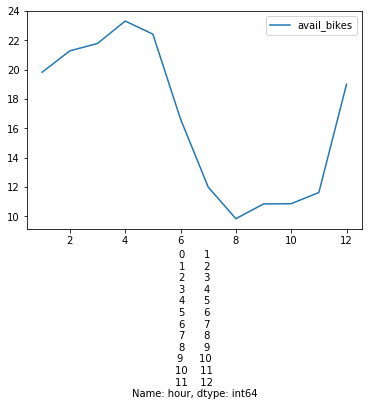

In [95]:
graph_df = explore_df[explore_df['pm']==0].groupby(['hour']).agg({'avail_bikes': [np.mean]})
graph_df = graph_df.reset_index()
graph_df.columns = graph_df.columns.droplevel(1)

graph_df.plot(x=['hour'], y='avail_bikes')
plt.xlabel(graph_df['hour'])

Text(0.5,0,'0      1\n1      2\n2      3\n3      4\n4      5\n5      6\n6      7\n7      8\n8      9\n9     10\n10    11\n11    12\nName: hour, dtype: int64')

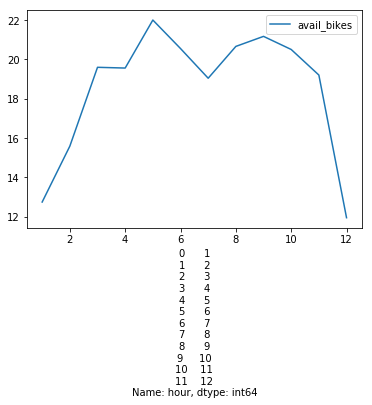

In [96]:
graph_df = explore_df[explore_df['pm']==1].groupby(['hour']).agg({'avail_bikes': [np.mean]})
graph_df = graph_df.reset_index()
graph_df.columns = graph_df.columns.droplevel(1)

graph_df.plot(x=['hour'], y='avail_bikes')
plt.xlabel(graph_df['hour'])